In [1]:
from PIL import Image
import glob
import pandas as pd
import cv2
import matplotlib.pylab as plt

In [2]:
dota = './output_for_model/*.png'
munich_label = '../munich_dataset/Munich_axis_aligned_bounding_boxes.csv'
dota_labels = './output_for_model/DOTA_axis_aligned_bounding_boxes.csv'
munich = '../munich_dataset/*.JPG'

In [3]:
image_list = glob.glob( munich )
label_list = pd.DataFrame.from_csv(munich_label)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app


In [4]:
names = []
for element in image_list:
    img = Image.open(element)
    width, height = img.size
    number_of_images_on_the_width = width // 300
    number_of_images_on_the_height = height // 300
    image_name = element.split('/')[-1].split('.')[0]
    for x in range(number_of_images_on_the_width):
        for y in range(number_of_images_on_the_height):
            area = (300*x, 300*y, 300*(x+1), 300*(y+1))
#             cropped_img = img.crop(area)
            name = '../munich_dataset/images/'+image_name+'-'+str(x)+'-'+str(y)+'.jpg'
#             cropped_img.save(name)
            names.append(name)

In [5]:
new_label_list = []
for element in image_list:
    img = Image.open(element)
    width, height = img.size
    number_of_images_on_the_width = width // 300
    number_of_images_on_the_height = height // 300
    image_name = element.split('/')[-1].split('.')[0]
    label_image = label_list.loc[label_list.orig_filename == image_name+'.JPG'].values
    for item in label_image:
        if (item[2] // 300 == item[4] // 300) and (item[3] // 300 == item[5] // 300):
            new_bottom_left_x = item[2] % 300
            new_bottom_left_y = item[3] % 300
            new_top_right_x = item[4] % 300
            new_top_right_y = item[5] % 300
            name = image_name+'-'+str(item[2] // 300)+'-'+str(item[3] // 300)+'.jpg'
            new_label_list.append([item[0], name, new_bottom_left_x, new_bottom_left_y, new_top_right_x, new_top_right_y])


In [7]:
df = pd.DataFrame(new_label_list, columns= ['type', 'orig_filename', 'bottom_left_x', 'bottom_left_y', 'top_right_x', 'top_right_y'])

In [ ]:
df.to_csv('/home/ubuntu/bmw/data_acquisition/munich_dataset/new_munich/Munich_axis_aligned_bounding_boxes.csv')

In [9]:
df.head()

type                                 orig_filename  bottom_left_x  \
0  car  2012-04-26-Muenchen-Tunnel_4K0G0070-11-8.jpg            154   
1  car   2012-04-26-Muenchen-Tunnel_4K0G0070-5-1.jpg            198   
2  car   2012-04-26-Muenchen-Tunnel_4K0G0070-5-1.jpg            171   
3  car   2012-04-26-Muenchen-Tunnel_4K0G0070-5-1.jpg            173   
4  car   2012-04-26-Muenchen-Tunnel_4K0G0070-5-1.jpg            171   

   bottom_left_y  top_right_x  top_right_y  
0            110          185           65  
1            217          237          198  
2            222          191          180  
3            175          192          138  
4            137          191           97

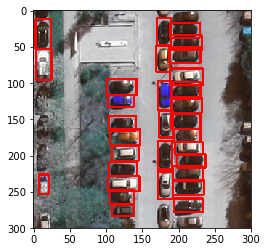

In [20]:
TEST_IMAGE_PATH = '/home/ubuntu/bmw/data_acquisition/munich_dataset/new_munich/images/'
TEST_IMAGE = "2012-04-26-Muenchen-Tunnel_4K0G0070-5-1.jpg"
image = cv2.imread(TEST_IMAGE_PATH + TEST_IMAGE)
for element in df.loc[df.orig_filename == TEST_IMAGE].values:
    cv2.rectangle(image, (element[2], element[3]), (element[4], element[5]), (255,0,0), 2)
plt.imshow(image)

In [42]:
for element in set(names):
    name = element.split('/')[-1]
    print(name)
    xml = '<annotation>\n'
    xml += '\t<filename>' + name + '</filename>\n'
    xml += '\t<size>\n'
    xml += '\t\t<width>300</width>\n'
    xml += '\t\t<height>300</height>\n'
    xml += '\t\t<depth>3</depth>\n'
    xml += '\t</size>\n'
    xml += '\t<segmented>0</segmented>\n'
    for item in df.loc[df.orig_filename == name].values:
        xml += '\t<object>\n'
        xml += '\t\t<name>' + item[0] + '</name>\n'
        xml += '\t\t<pose>Unspecified</pose>\n'
        xml += '\t\t<truncated>0</truncated>\n'
        xml += '\t\t<difficult>0</difficult>\n'
        xml += '\t\t<bndbox>\n'
#         xml += '\t\t\t<xmin>' + str(item[2]) + '</xmin>\n'
#         xml += '\t\t\t<ymin>' + str(item[3]) + '</ymin>\n'
#         xml += '\t\t\t<xmax>' + str(item[4]) + '</xmax>\n'
#         xml += '\t\t\t<ymax>' + str(item[5]) + '</ymax>\n'
    
        xml += '\t\t\t<xmin>' + str(item[2]) + '</xmin>\n'
        xml += '\t\t\t<ymin>' + str(item[5]) + '</ymin>\n'
        xml += '\t\t\t<xmax>' + str(item[4]) + '</xmax>\n'
        xml += '\t\t\t<ymax>' + str(item[3]) + '</ymax>\n'
        
        xml += '\t\t</bndbox>\n'
        xml += '\t</object>\n'
    xml += '</annotation>\n'
    f =  open("../munich_dataset/labels/"+name.split('.')[0]+".xml", "w")
    f.write(xml)
    f.close()

2012-04-26-Muenchen-Tunnel_4K0G0160-4-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-5-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-8-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-9-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-11-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-10-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-3-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-2-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-14-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-4-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-8-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-16-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-0-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-11-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-6-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-3-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-0-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-14-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-16-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-2-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-15-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-15-6.jpg
2012-04-26-Muenchen-T

2012-04-26-Muenchen-Tunnel_4K0G0285-4-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-7-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-1-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-4-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-7-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-1-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-14-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-5-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-13-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-7-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-5-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-12-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-9-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-4-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-2-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-5-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-12-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-6-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-0-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-6-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-14-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-6-9.jpg
2012-04-26-Muenchen-Tunne

2012-04-26-Muenchen-Tunnel_4K0G0060-9-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-15-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-1-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-1-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-17-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-12-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-6-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-11-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-7-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-9-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-3-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-11-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-0-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-10-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-14-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-5-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-4-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-1-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-2-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-12-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-16-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-0-6.jpg
2012-04-26-Muenchen-Tu

2012-04-26-Muenchen-Tunnel_4K0G0120-16-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-5-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-1-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-3-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-16-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-10-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-7-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-5-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-6-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-7-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-12-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-10-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-11-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-5-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-11-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-4-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-0-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-12-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-8-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-4-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-13-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-10-4.jpg
2012-04-26-Muen

2012-04-26-Muenchen-Tunnel_4K0G0090-6-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-9-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-5-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-13-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-17-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-2-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-3-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-12-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-13-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-11-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-14-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-11-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-8-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-16-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-12-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-8-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-9-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-10-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-6-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-6-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-16-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-5-5.jpg
2012-04-26-Muenche

2012-04-26-Muenchen-Tunnel_4K0G0080-13-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-16-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-6-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-8-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-2-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-7-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-12-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-4-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-13-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-12-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-0-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-9-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-11-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-14-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-14-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-8-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-14-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-10-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-16-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-13-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-7-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-0-2.jpg
2012-04-26-Muen

2012-04-26-Muenchen-Tunnel_4K0G0285-8-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-5-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-9-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-14-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-0-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-16-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-12-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-4-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-12-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-3-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-13-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-12-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-4-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-15-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-5-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-3-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-3-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-12-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-2-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-6-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-13-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-14-0.jpg
2012-04-26-Muench

2012-04-26-Muenchen-Tunnel_4K0G0140-6-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-8-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-13-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-7-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-16-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-4-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-11-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-1-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-5-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-9-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-17-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-8-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-2-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-6-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-6-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-16-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-16-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-12-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-17-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-13-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-3-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-9-11.jpg
2012-04-26-Mu

2012-04-26-Muenchen-Tunnel_4K0G0120-17-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-13-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-3-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-8-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-11-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-14-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-17-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-3-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-6-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-16-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-8-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-6-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-13-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-9-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-12-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-6-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-3-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-15-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-16-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-2-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-11-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-10-10.jpg
2012-04-26-Muenc

2012-04-26-Muenchen-Tunnel_4K0G0100-0-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-9-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-5-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-4-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-12-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-5-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-5-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-3-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-11-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-14-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-13-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-12-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-12-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-16-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-0-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-11-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-15-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-10-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-12-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-3-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-17-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-6-9.jpg
2012-04-26-Muenc

2012-04-26-Muenchen-Tunnel_4K0G0100-13-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-13-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-15-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-9-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-15-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-4-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-7-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-1-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-5-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-3-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-15-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-6-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-8-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-0-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-10-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-16-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-5-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-3-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-4-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-14-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-11-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-3-11.jpg
2012-04-26-Muenche

2012-04-26-Muenchen-Tunnel_4K0G0278-14-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-9-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-13-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-2-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-15-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-6-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-7-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-0-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-17-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-8-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-13-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-4-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-1-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-7-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-14-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-3-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-8-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-3-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-13-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-17-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-6-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-13-10.jpg
2012-04-26-Muenchen-

2012-04-26-Muenchen-Tunnel_4K0G0285-10-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-2-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-12-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-3-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-10-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-7-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-13-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-1-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-6-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-10-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-9-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-2-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-17-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-7-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-0-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-11-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-2-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-5-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-1-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-15-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-8-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-17-3.jpg
2012-04-26-Muenchen-

2012-04-26-Muenchen-Tunnel_4K0G0010-13-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-0-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-1-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-12-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-15-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-14-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-9-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-10-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-16-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-17-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-10-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-17-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-14-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-11-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-17-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-10-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-11-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-1-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-17-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-10-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-12-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-13-9.jpg
2012-04-2

2012-04-26-Muenchen-Tunnel_4K0G0160-2-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-0-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-2-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-0-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-5-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-1-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-0-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-17-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-17-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-9-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0030-9-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-11-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-2-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-11-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-0-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-14-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-3-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0160-16-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0130-9-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-1-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0150-11-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-17-10.jpg
2012-04-26-Muenchen-

2012-04-26-Muenchen-Tunnel_4K0G0285-8-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-7-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-1-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-2-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0265-15-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-15-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-17-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-7-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-2-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-15-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-1-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-2-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-10-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-3-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-11-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-3-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-11-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-2-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-5-7.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-1-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0080-3-10.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-10-9.jpg
2012-04-26-Muenchen-T

2012-04-26-Muenchen-Tunnel_4K0G0080-11-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-12-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0120-9-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-3-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-1-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-8-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-2-6.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-0-0.jpg
2012-04-26-Muenchen-Tunnel_4K0G0060-4-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-14-8.jpg
2012-04-26-Muenchen-Tunnel_4K0G0250-5-4.jpg
2012-04-26-Muenchen-Tunnel_4K0G0070-4-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0278-10-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0010-16-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0040-5-3.jpg
2012-04-26-Muenchen-Tunnel_4K0G0100-6-1.jpg
2012-04-26-Muenchen-Tunnel_4K0G0110-4-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0051-4-11.jpg
2012-04-26-Muenchen-Tunnel_4K0G0090-8-2.jpg
2012-04-26-Muenchen-Tunnel_4K0G0020-5-5.jpg
2012-04-26-Muenchen-Tunnel_4K0G0140-1-9.jpg
2012-04-26-Muenchen-Tunnel_4K0G0285-11-10.jpg
2012-04-26-Muenchen-Tun

In [162]:
pwd

'/home/ubuntu/bmw/data_acquisition/DOTA'

In [104]:
len(set(names))

4320

In [105]:
names

['../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-0.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-1.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-2.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-3.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-4.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-5.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-6.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-7.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-8.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-9.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-10.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-0-11.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tunnel_4K0G0070-1-0.png',
 '../munich_dataset/images/2012-04-26-Muenchen-Tu